In [14]:
from pyspark import SparkContext
import json

sc = SparkContext()

22/05/20 18:56:12 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [12]:
#sc.stop()

In [16]:
# RDD base y extraccion de datos

text_sample = '201707_movements.json'

rdd_base = sc.textFile(text_sample)

def mapper(line):
    data = json.loads(line)
    # u_t = data['user_type'] # No se necesita por ahora (?)
    u_c = data['user_day_code']
    start = data['idunplug_station']
    end = data['idplug_station']
    time = data['travel_time']
    date = data['unplug_hourTime']
    return u_c, start, end, time, date

rdd = rdd_base.map(mapper)
rdd.count()

351289

In [44]:
print(rdd.take(10))

[('09a2f5ddbd53f1c6c529fdf1e3d60fc77001b5d41bd21806e09d40d8ae80fb33', 13, 61, 239, {'$date': '2017-07-01T01:00:00.000+0200'}), ('f26e11fcb5aba6bfc136af58a61cb962c7e8cef0e593c8910bcb9883a4f38f14', 31, 44, 284, {'$date': '2017-07-01T01:00:00.000+0200'}), ('86ef0681c2017e7c95986f5be1490c7027c9608fd29acc8967dcd6c33030361d', 14, 13, 109, {'$date': '2017-07-01T01:00:00.000+0200'}), ('d46189d811469cad39c5f227847d7bfcfe7e27aac0777cd3b7b0f0f7245e42e8', 127, 89, 338, {'$date': '2017-07-01T01:00:00.000+0200'}), ('739b535771ba572318e3f7a761eaa57ad1be934156bd228a6c1fa702068518c6', 85, 69, 333, {'$date': '2017-07-01T01:00:00.000+0200'}), ('529a25e25e2ad97e5d6eec918d63dc340f36ed1881c68fb599b16657aa0dc604', 101, 107, 70, {'$date': '2017-07-01T01:00:00.000+0200'}), ('058a5fd335215c4fb560c19d5bfe464557d4b63a2f212fdc05313c937d11a185', 38, 175, 222, {'$date': '2017-07-01T01:00:00.000+0200'}), ('5b94380a0a97064949882478239f17737edcac8d1f8c91a6c85959b54d6ea0e6', 26, 13, 239, {'$date': '2017-07-01T01:00:00.0

In [86]:
rdd_day = rdd.map(lambda x: (x[4]['$date'][8:10], _)).countByKey()


In [85]:
test = rdd.take(1)
print(test[0][4]['$date'][8:10])

01


In [87]:
print(rdd_day)

defaultdict(<class 'int'>, {'01': 8856, '02': 8420, '03': 12873, '04': 14057, '05': 14347, '06': 6925, '07': 8548, '08': 8695, '09': 9058, '10': 13155, '11': 13739, '12': 14113, '13': 13396, '14': 12415, '15': 8520, '16': 8264, '17': 12507, '18': 13183, '19': 13469, '20': 13688, '21': 12876, '22': 8856, '23': 7899, '24': 12380, '25': 13173, '26': 13395, '27': 13991, '28': 12581, '29': 8543, '30': 7788, '31': 11579})


In [56]:
import matplotlib.pyplot as plt

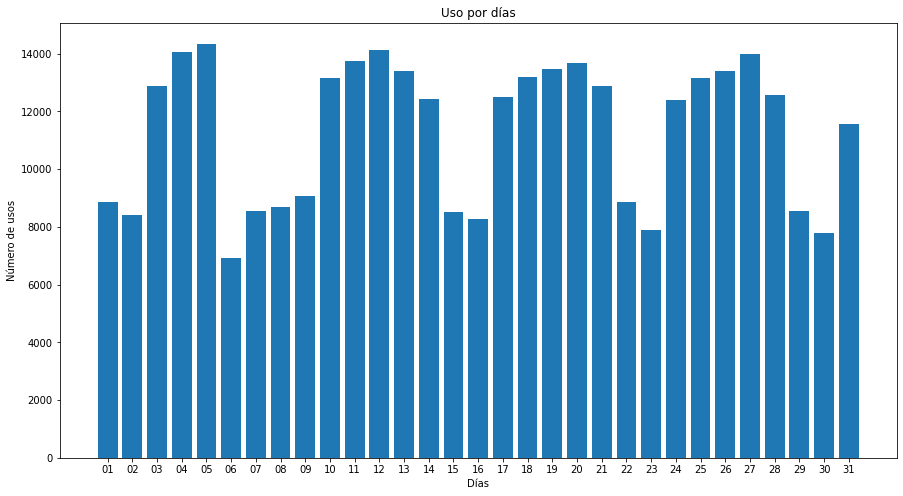

In [103]:
days = rdd_day.keys()
num_usage = rdd_day.values()

plt.figure(figsize=(15,8))
plt.bar(days, num_usage)
plt.ylabel('Número de usos')
plt.xlabel('Días')
plt.title('Uso por días')


plt.show()

dict_items([('2017-07-01', 8856), ('2017-07-02', 8420), ('2017-07-03', 12873), ('2017-07-04', 14057), ('2017-07-05', 14347), ('2017-07-06', 6925), ('2017-07-07', 8548), ('2017-07-08', 8695), ('2017-07-09', 9058), ('2017-07-10', 13155), ('2017-07-11', 13739), ('2017-07-12', 14113), ('2017-07-13', 13396), ('2017-07-14', 12415), ('2017-07-15', 8520), ('2017-07-16', 8264), ('2017-07-17', 12507), ('2017-07-18', 13183), ('2017-07-19', 13469), ('2017-07-20', 13688), ('2017-07-21', 12876), ('2017-07-22', 8856), ('2017-07-23', 7899), ('2017-07-24', 12380), ('2017-07-25', 13173), ('2017-07-26', 13395), ('2017-07-27', 13991), ('2017-07-28', 12581), ('2017-07-29', 8543), ('2017-07-30', 7788), ('2017-07-31', 11579)])
